<a href="https://colab.research.google.com/github/mjain2/csci544-group32/blob/main/LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re 
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_theme()
sns.set(rc = {'figure.figsize':(15,8)})
%matplotlib inline 

In [ ]:
!pip install --upgrade language_tool_python
import language_tool_python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
train_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NLP/Project/feedback-prize-english-language-learning/train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NLP/Project/feedback-prize-english-language-learning/test.csv')

### Words Count Analysis

In [ ]:
train_df['num_words'] = train_df['full_text'].apply(lambda x: len(x.split()))
avg_words = round(train_df['num_words'].mean())
max_words = round(train_df['num_words'].max())
print('Average length: {}'.format(avg_words))
print('Max length: {}'.format(max_words))

Average length: 430
Max length: 1260


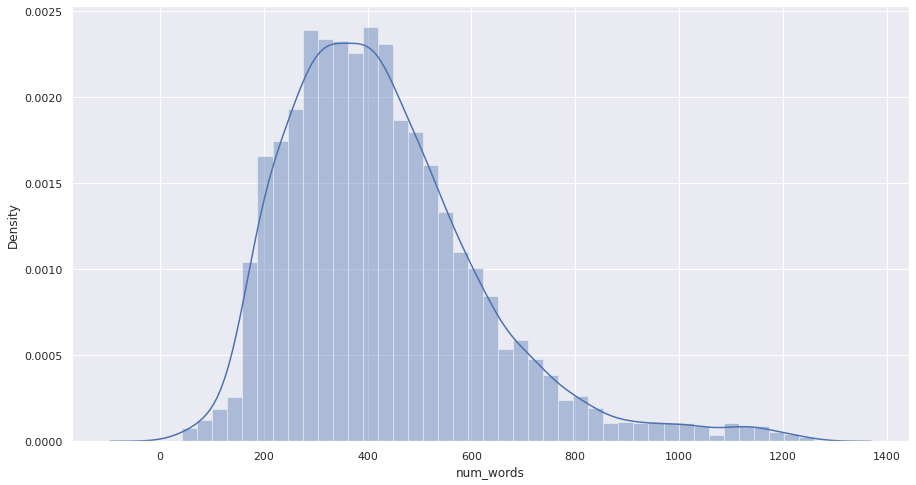

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(train_df['num_words'], kde=True)

### Dataset Preparation

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['full_text'])
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train_df['full_text'])
pad_train = pad_sequences(train_seq, maxlen=max_words, truncating='post')

test_seq = tokenizer.texts_to_sequences(test_df['full_text'])
pad_test = pad_sequences(test_seq, maxlen=max_words, truncating='post')

In [ ]:
word_idx_count = len(word_index)
print(word_idx_count)

22170


In [ ]:
X = pad_train
y = [train_df['cohesion'].values, train_df['syntax'].values, train_df['vocabulary'].values,
      train_df['phraseology'].values, train_df['grammar'].values, train_df['conventions'].values]

### LSTM

In [ ]:
def get_lstm_model():

    inputs = tf.keras.layers.Input(shape=(max_words))
    embeddings = tf.keras.layers.Embedding(word_idx_count + 1, 512, input_length=max_words)(inputs)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True))(embeddings)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(x)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(x)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
    
    output1 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output1 = tf.keras.layers.Dropout(0.4)(output1)
    output1 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output1)
    output1 = tf.keras.layers.Dropout(0.4)(output1)
    output1 = tf.keras.layers.Dense(1, activation='relu', name='cohesion')(output1)
    
    output2 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output2 = tf.keras.layers.Dropout(0.4)(output2)
    output2 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output2)
    output2 = tf.keras.layers.Dropout(0.4)(output2)
    output2 = tf.keras.layers.Dense(1, activation='relu', name='syntax')(output2)
    
    output3 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output3 = tf.keras.layers.Dropout(0.4)(output3)
    output3 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output3)
    output3 = tf.keras.layers.Dropout(0.4)(output3)
    output3 = tf.keras.layers.Dense(1, activation='relu', name='vocabulary')(output3)
    
    output4 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output4 = tf.keras.layers.Dropout(0.4)(output4)
    output4 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output4)
    output4 = tf.keras.layers.Dropout(0.4)(output4)
    output4 = tf.keras.layers.Dense(1, activation='relu', name='phraseology')(output4)
    
    output5 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output5 = tf.keras.layers.Dropout(0.4)(output5)
    output5 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output5)
    output5 = tf.keras.layers.Dropout(0.4)(output5)
    output5 = tf.keras.layers.Dense(1, activation='relu', name='grammar')(output5)  
    
    output6 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output6 = tf.keras.layers.Dropout(0.4)(output6)
    output6 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4), 
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4), 
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output6)
    output6 = tf.keras.layers.Dropout(0.4)(output6)
    output6 = tf.keras.layers.Dense(1, activation='relu', name='conventions')(output6)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=[output1, output2, output3, output4, output5, output6])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss = tf.keras.losses.mean_squared_error
    )
    
    return model

In [ ]:
model = get_lstm_model()

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1260)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1260, 512)    11351552    ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 1260, 1024)   4198400     ['embedding[0][0]']              
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 1260, 256)   1180672     ['bidirectional[0][0]']          
 )                                                                                            

In [ ]:
history = model.fit(X, y, epochs=10, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/10
98/98 [==============================] - 52s 531ms/step - loss: 5.1831 - cohesion_loss: 0.8340 - syntax_loss: 0.8529 - vocabulary_loss: 0.8009 - phraseology_loss: 0.8518 - grammar_loss: 0.8985 - conventions_loss: 0.8707 - val_loss: 2.8820 - val_cohesion_loss: 0.4582 - val_syntax_loss: 0.4594 - val_vocabulary_loss: 0.3907 - val_phraseology_loss: 0.5041 - val_grammar_loss: 0.5098 - val_conventions_loss: 0.4884
Epoch 2/10
98/98 [==============================] - 49s 496ms/step - loss: 4.8118 - cohesion_loss: 0.7716 - syntax_loss: 0.7940 - vocabulary_loss: 0.7489 - phraseology_loss: 0.7941 - grammar_loss: 0.8381 - conventions_loss: 0.7945 - val_loss: 2.6835 - val_cohesion_loss: 0.4572 - val_syntax_loss: 0.4221 - val_vocabulary_loss: 0.3308 - val_phraseology_loss: 0.4301 - val_grammar_loss: 0.4963 - val_conventions_loss: 0.4775
Epoch 3/10
98/98 [==============================] - 48s 494ms/step - loss: 4.6656 - cohesion_loss: 0.7366 - syntax_loss: 0.7758 - vocabulary_loss: 0.7334 

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MSE]')
    plt.legend()
    plt.grid(True)

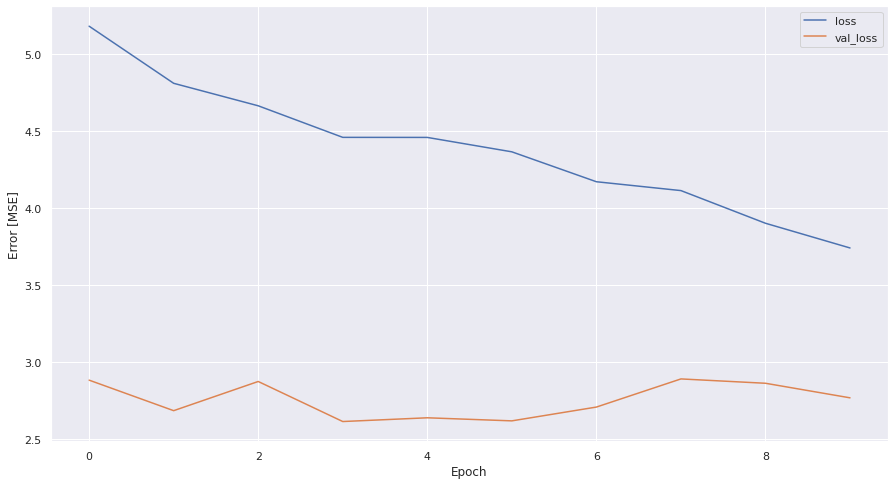

In [ ]:
plot_loss(history)

### Saving LSTM

In [ ]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/NLP/Project/feedback-prize-english-language-learning/lstm_model.h5')

### Loading the LSTM model 

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/NLP/Project/feedback-prize-english-language-learning/lstm_model.h5')

In [ ]:
X_test = pad_train
results = model.predict(X_test)
lstm_submission_train = pd.DataFrame()
lstm_submission_train['text_id'] = train_df['text_id']
for i in range(6):
    lstm_submission_train[i] = pd.Series([float(x) for x in results[i]])
lstm_submission_train.columns = train_df.drop(columns=['full_text', 'num_words']).columns
lstm_submission_train['text_id'] = train_df['text_id']

lstm_submission_train.head()

123/123 [==============================] - 23s 190ms/step


,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,3.282510,3.273651,3.369876,3.128019,3.306530,3.335952
1,0022683E9EA5,2.927514,2.847336,2.993550,2.763618,2.923829,2.926355
2,00299B378633,3.197886,3.168996,3.275342,3.037946,3.211999,3.232405
3,003885A45F42,3.421712,3.453564,3.535726,3.284441,3.472092,3.515730
4,0049B1DF5CCC,3.068267,3.010552,3.134091,2.900490,3.070340,3.079011


In [ ]:
target_cols = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

In [ ]:
X_test = pad_test
results = model.predict(X_test)
lstm_submission = pd.DataFrame()
lstm_submission['text_id'] = test_df['text_id']
for i in range(6):
    lstm_submission[i] = pd.Series([float(x) for x in results[i]])
lstm_submission.columns = train_df.drop(columns=['full_text', 'num_words']).columns
lstm_submission['text_id'] = test_df['text_id']

lstm_submission.head()

1/1 [==============================] - 0s 186ms/step


,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,2.848783,2.757720,2.916774,2.689219,2.842958,2.843955
1,000BAD50D026,3.459145,3.497568,3.576564,3.321732,3.509279,3.565041
2,00367BB2546B,3.021687,2.954948,3.085000,2.853040,3.020295,3.025939


In [ ]:
def comp_score(y_true,y_pred):
    rmse_scores = []
    for i in range(len(target_cols)):
        rmse_scores.append(np.sqrt(mean_squared_error(y_true[:,i],y_pred[:,i])))
    return np.mean(rmse_scores)

In [ ]:
print(comp_score(np.array(train_df[target_cols]), np.array(lstm_submission_train[target_cols])))

0.5985894818390786


### Finding the stronger and weaker part of Essay 

In [ ]:
para_list = []
key_list = []

for index in test_df.index:
  key = test_df['text_id'].iloc[index]
  text_list = test_df['full_text'].iloc[index].split("\n")
  final_text = []
  for text in text_list:
    if len(text) > 10:
      final_text.append(text)

  para_list.extend(final_text)
  key_list.extend([key for i in range(len(final_text))])

In [ ]:
para_df = pd.DataFrame()
para_df['text_id'] = key_list
para_df['full_text'] = para_list

In [ ]:
para_seq = tokenizer.texts_to_sequences(para_df['full_text'])
pad_para = pad_sequences(para_seq, maxlen=max_words, truncating='post')

X_test_para = pad_para
results = model.predict(X_test_para)

lstm_submission_para = pd.DataFrame()
lstm_submission_para['text_id'] = para_df['text_id']

for i in range(6):
    lstm_submission_para[i] = pd.Series([float(x) for x in results[i]])
lstm_submission_para.columns = train_df.drop(columns=['full_text', 'num_words']).columns
lstm_submission_para['text_id'] = para_df['text_id']
lstm_submission_para['full_text'] = para_df['full_text']

lstm_submission_para.head()

1/1 [==============================] - 0s 193ms/step


,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions,full_text
0,0000C359D63E,3.309421,3.308018,3.401232,3.158089,3.338328,3.369349,when a person has no experience on a job their...
1,0000C359D63E,3.158731,3.121032,3.231731,2.996434,3.169460,3.185546,"yes, even thought you may not have experience ..."
2,0000C359D63E,2.723413,2.608602,2.782124,2.558853,2.707006,2.702266,If you dont have experence in a restaurant for...
3,0000C359D63E,3.456025,3.493727,3.573276,3.318552,3.506110,3.560393,My dad has always talk with my cousins that wh...
4,0000C359D63E,2.788485,2.687580,2.856175,2.627550,2.779032,2.778413,In every job their is always going to be a per...


In [ ]:
lstm_submission_para

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions,full_text
0,0000C359D63E,3.309421,3.308018,3.401232,3.158089,3.338328,3.369349,when a person has no experience on a job their...
1,0000C359D63E,3.158731,3.121032,3.231731,2.996434,3.169460,3.185546,"yes, even thought you may not have experience ..."
2,0000C359D63E,2.723413,2.608602,2.782124,2.558853,2.707006,2.702266,If you dont have experence in a restaurant for...
3,0000C359D63E,3.456025,3.493727,3.573276,3.318552,3.506110,3.560393,My dad has always talk with my cousins that wh...
4,0000C359D63E,2.788485,2.687580,2.856175,2.627550,2.779032,2.778413,In every job their is always going to be a per...
5,0000C359D63E,2.848713,2.757782,2.916678,2.689212,2.842931,2.843895,"I think yes, you can be a good candidate to be..."
6,000BAD50D026,3.307261,3.302990,3.396756,3.153998,3.332157,3.368976,Do you think students would benefit from being...
7,000BAD50D026,3.301543,3.296459,3.390664,3.148166,3.326500,3.361804,Yes! its benefit for student who attend classe...
8,000BAD50D026,3.459129,3.497639,3.576541,3.321793,3.509279,3.565007,some student attend classes from home because ...
9,00367BB2546B,3.248961,3.232156,3.332257,3.093129,3.269393,3.294416,"Thomas Jefferson once states that ""it is wonde..."


### Grammar

In [ ]:
tool = language_tool_python.LanguageTool('en-US')

INFO:language_tool_python.download_lt:Unzipping /tmp/tmpfv_miv46.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-5.7.zip to /root/.cache/language_tool_python.


In [ ]:
def get_feedback(df):

  issues_list = []

  for ind in df.index:
    text = df["full_text"].iloc[ind]
    
    # get the matches
    matches = tool.check(text)
    
    my_mistakes = []
    my_corrections = []
    start_positions = []
    end_positions = []
    
    for rules in matches:
        if len(rules.replacements)>0:
            start_positions.append(rules.offset)
            end_positions.append(rules.errorLength+rules.offset)
            my_mistakes.append(text[rules.offset:rules.errorLength+rules.offset])
            my_corrections.append(rules.replacements[0])
        
    
        
    my_new_text = list(text)
    
    
    for m in range(len(start_positions)):
        for i in range(len(text)):
            my_new_text[start_positions[m]] = my_corrections[m]
            if (i>start_positions[m] and i<end_positions[m]):
                my_new_text[i]=""
        
    my_new_text = "".join(my_new_text)

    issues_list.append(list(zip(my_mistakes,my_corrections)))
  
  return issues_list

In [ ]:
issues_list = get_feedback(lstm_submission_para)

In [ ]:
lstm_submission_para['issues_list'] = issues_list

In [ ]:
lstm_submission_para.head()

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions,full_text,issues_list
0,0000C359D63E,3.309421,3.308018,3.401232,3.158089,3.338328,3.369349,when a person has no experience on a job their...,"[(when, When), (their, there), (explane, enpla..."
1,0000C359D63E,3.158731,3.121032,3.231731,2.996434,3.169460,3.185546,"yes, even thought you may not have experience ...","[(yes, Yes), (,you, , you)]"
2,0000C359D63E,2.723413,2.608602,2.782124,2.558853,2.707006,2.702266,If you dont have experence in a restaurant for...,"[(dont, don't), (experence, experience), (expe..."
3,0000C359D63E,3.456025,3.493727,3.573276,3.318552,3.506110,3.560393,My dad has always talk with my cousins that wh...,"[(talk, talked), (their, there), (cosuin, cous..."
4,0000C359D63E,2.788485,2.687580,2.856175,2.627550,2.779032,2.778413,In every job their is always going to be a per...,"[(their, there), (the learn, to learn), (thay,..."


### Weak paragraph

In [ ]:
lstm_submission["mean"] = lstm_submission[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar','conventions']].mean(axis=1)

In [ ]:
id_mean_dict = {}

for index in lstm_submission.index:
  id = lstm_submission["text_id"].iloc[index]
  id_mean_dict[id] = lstm_submission["mean"].iloc[index]


In [ ]:
lstm_submission_para["strength"] = "Weak"

In [ ]:
for key,avg in id_mean_dict.items():
  
  temp  = lstm_submission_para[lstm_submission_para["text_id"] == key ]
  s_index = temp.loc[(temp['cohesion'] > avg) & (temp['syntax'] > avg) & (temp['vocabulary'] > avg) & (temp['phraseology'] > avg) & (temp['grammar'] > avg) & (temp['conventions'] > avg)].index
  lstm_submission_para["strength"].loc[s_index] = "Strong"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
lstm_submission_para

,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions,full_text,issues_list,strength
0,0000C359D63E,3.309421,3.308018,3.401232,3.158089,3.338328,3.369349,when a person has no experience on a job their...,"[(when, When), (their, there), (explane, enpla...",Strong
1,0000C359D63E,3.158731,3.121032,3.231731,2.996434,3.169460,3.185546,"yes, even thought you may not have experience ...","[(yes, Yes), (,you, , you)]",Strong
2,0000C359D63E,2.723413,2.608602,2.782124,2.558853,2.707006,2.702266,If you dont have experence in a restaurant for...,"[(dont, don't), (experence, experience), (expe...",Weak
3,0000C359D63E,3.456025,3.493727,3.573276,3.318552,3.506110,3.560393,My dad has always talk with my cousins that wh...,"[(talk, talked), (their, there), (cosuin, cous...",Strong
4,0000C359D63E,2.788485,2.687580,2.856175,2.627550,2.779032,2.778413,In every job their is always going to be a per...,"[(their, there), (the learn, to learn), (thay,...",Weak
5,0000C359D63E,2.848713,2.757782,2.916678,2.689212,2.842931,2.843895,"I think yes, you can be a good candidate to be...","[(a, an), (dont, don't), (going, go), (Practic...",Weak
6,000BAD50D026,3.307261,3.302990,3.396756,3.153998,3.332157,3.368976,Do you think students would benefit from being...,"[(able attend, able to attend)]",Weak
7,000BAD50D026,3.301543,3.296459,3.390664,3.148166,3.326500,3.361804,Yes! its benefit for student who attend classe...,"[(its, Its), (student want, students want), (t...",Weak
8,000BAD50D026,3.459129,3.497639,3.576541,3.321793,3.509279,3.565007,some student attend classes from home because ...,"[(some, Some), (student attend, students atten...",Weak
9,00367BB2546B,3.248961,3.232156,3.332257,3.093129,3.269393,3.294416,"Thomas Jefferson once states that ""it is wonde...","[(,I, , I), (always, Always), (,it, , it), (,y...",Strong


### Making correction in text 

In [ ]:
updated_text = []
for ind in lstm_submission_para.index:
  full_text = lstm_submission_para.iloc[ind]["full_text"]
  issues_list = lstm_submission_para.iloc[ind]["issues_list"]

  for issue in issues_list:
    full_text = full_text.replace(issue[0], issue[1])
  
  updated_text.append(full_text)

In [ ]:
lstm_submission_para['updated_text'] = updated_text

### Creating new dataframe with combining paragraph to essay 

In [ ]:
lstm_submission_para['new_essay'] =lstm_submission_para.groupby(['text_id'])['updated_text'].transform(lambda x : '\n'.join(x))

In [ ]:
lstm_submission_para_new =  lstm_submission_para[['text_id', 'new_essay']].drop_duplicates()

In [ ]:
lstm_submission_para_new

,text_id,new_essay
0,0000C359D63E,When a person have no experience on a job ther...
6,000BAD50D026,Do you think students would benefit from being...
9,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


### Evaluating essay on updated text

In [ ]:
test_seq = tokenizer.texts_to_sequences(lstm_submission_para_new['new_essay'])
pad_test = pad_sequences(test_seq, maxlen=max_words, truncating='post')

X_test = pad_test
results = model.predict(X_test)
lstm_submission_new = pd.DataFrame()
lstm_submission_new['text_id'] = test_df['text_id']
for i in range(6):
    lstm_submission_new[i] = pd.Series([float(x) for x in results[i]])
lstm_submission_new.columns = train_df.drop(columns=['full_text', 'num_words']).columns
lstm_submission_new['text_id'] = test_df['text_id']

lstm_submission_new.head()

1/1 [==============================] - 0s 178ms/step


,text_id,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,3.052899,2.994851,3.121371,2.888386,3.057064,3.065004
1,000BAD50D026,3.460105,3.498620,3.577665,3.322809,3.510040,3.566659
2,00367BB2546B,3.021687,2.954948,3.085000,2.853040,3.020295,3.025939


In [ ]:
lstm_submission

,text_id,old_cohesion,old_syntax,old_vocabulary,old_phraseology,old_grammar,old_conventions
0,0000C359D63E,2.848783,2.757720,2.916774,2.689219,2.842958,2.843955
1,000BAD50D026,3.459145,3.497568,3.576564,3.321732,3.509279,3.565041
2,00367BB2546B,3.021687,2.954948,3.085000,2.853040,3.020295,3.025939


### Compare results

In [ ]:
lstm_submission.columns = ['text_id',	'old_cohesion',	'old_syntax',	'old_vocabulary',	'old_phraseology',	'old_grammar',	'old_conventions']

In [ ]:
merge_df = pd.merge(lstm_submission, lstm_submission_new, on=["text_id"])

In [ ]:
merge_df

,text_id,old_cohesion,old_syntax,old_vocabulary,old_phraseology,old_grammar,old_conventions,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,2.848783,2.757720,2.916774,2.689219,2.842958,2.843955,3.052899,2.994851,3.121371,2.888386,3.057064,3.065004
1,000BAD50D026,3.459145,3.497568,3.576564,3.321732,3.509279,3.565041,3.460105,3.498620,3.577665,3.322809,3.510040,3.566659
2,00367BB2546B,3.021687,2.954948,3.085000,2.853040,3.020295,3.025939,3.021687,2.954948,3.085000,2.853040,3.020295,3.025939


In [ ]:
for col in ['cohesion',	'syntax',	'vocabulary',	'phraseology',	'grammar',	'conventions']:
  merge_df['diff_' + col] = lstm_submission_new[col] - lstm_submission["old_"+ col]

In [ ]:
lift_dict = {}

for col in ['cohesion',	'syntax',	'vocabulary',	'phraseology',	'grammar',	'conventions']:
  lift_dict[col] = merge_df['diff_' + col].mean()

In [ ]:
lift_dict

{'cohesion': 0.0683590571085612,
 'syntax': 0.07939418156941731,
 'vocabulary': 0.06856584548950195,
 'phraseology': 0.06674814224243164,
 'grammar': 0.07162229220072429,
 'conventions': 0.07422280311584473}

### Suggestion on weak paragraph

In [ ]:
lstm_submission_para.to_csv("/content/gdrive/MyDrive/Colab Notebooks/NLP/Project/feedback-prize-english-language-learning/abc.csv")